In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


0.020391668391923946
0.020618124386586296
0.08372678007058812
0.9580161892507914
0.9449204123622602
1.352186945032446
0.25567208616517456
0.27692056299464035
0.5106091785687177
0.9999995205395203
0.9999763246479966
1.000034814272743


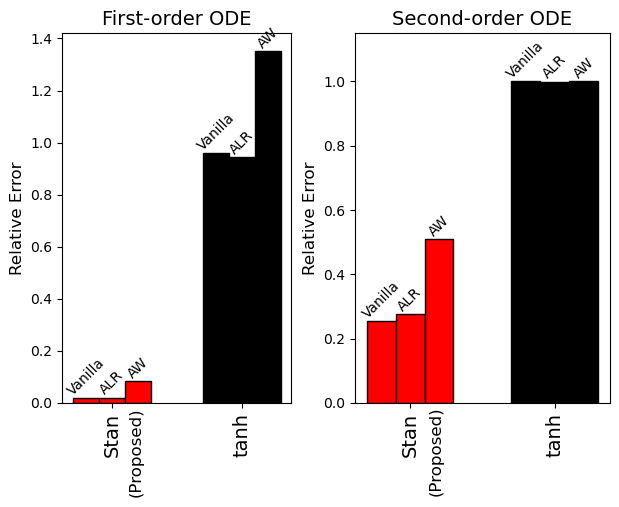

In [30]:
folder_base = './FODE_mod/'

fig, axs = plt.subplots(1,2)
ax = axs[0]

num_steps = 200
prob_name = "1D_FODE_"

levels = ["_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','stan ALR/','stan AW/','tanh/','tanh ALR/','tanh AW/']
algo_names = ['stan','stanALR','stanAW','tanh','tanhALR','tanhAW']

stop = -5

tick_locs = np.zeros((2,))


for i in range(2):
    mean_test_loss = np.zeros((3,))

    level = levels[0]
    
    for j in range(3):
        dat = scipy.io.loadmat(folder_base + folders[3*i+j]+prob_name+algo_names[3*i+j]+level+'.mat')
        test_loss =  dat['test_re_loss']
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
        print(mean_test_loss[j])
        
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['Vanilla','ALR','AW'],fontsize=10,rotation = 45)
    
    
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels[:2],rotation = 90,fontsize = 14)
# ax.set_ylim([0,1.5])
# # ax.set_ylim([0,1.1])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.65,-0.35,'(Proposed)',rotation = 90,fontsize = 12)
ax.set_title('First-order ODE', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
ax.set_aspect(10)

# ax.figure.set_size_inches(10, 5)

#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------
folder_base = './SODE/'

ax = axs[1]

num_steps = 200
prob_name = "1D_SODE_"

levels = ["_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','stan ALR/','stan AW/','tanh/','tanh ALR/','tanh AW/']
algo_names = ['stan','stanALR','stanAW','tanh','tanhALR','tanhAW']

stop = -5

tick_locs = np.zeros((2,))


for i in range(2):
    mean_test_loss = np.zeros((3,))

    level = levels[0]
    
    for j in range(3):
        dat = scipy.io.loadmat(folder_base + folders[3*i+j]+prob_name+algo_names[3*i+j]+level+'.mat')
        test_loss =  dat['test_re_loss']
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
        print(mean_test_loss[j])
        
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['Vanilla','ALR','AW'],fontsize=10,rotation = 45)
    
    
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels[:2],rotation = 90,fontsize = 14)

ax.set_ylim([0,1.15])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.65,-0.28,'(Proposed)',rotation = 90,fontsize = 12)
ax.set_title('Second-order ODE', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
# ax.set_aspect(10)
# ax.figure.set_size_inches(21, 5)

fig.subplots_adjust(right = 1)
fig.savefig('ALR_AW_re_bars.pdf', format='pdf', bbox_inches='tight')
# fig.savefig('Numerical_re_bars.pdf', format='pdf', bbox_inches='tight')



In [ ]:
folder_base = './1D/FODE_mod/'

num_steps = 200
prob_name = "1D_FODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','tanhALR','tanhAW','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','tanh ALR/','tanh AW/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','tanhALR','tanhAW','swish','rowdy']

stop = -5


for i in range(7):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

In [ ]:
folder_base = './1D/SODE/'

num_steps = 200
prob_name = "1D_SODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','tanhALR','tanhAW','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','tanh ALR/','tanh AW/','swish/','rowdy/']
algo_names = ['Stan','tanh','atanh','tanhALR','tanhAW','swish','rowdy']

stop = -5


for i in range(7):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")